In [91]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt

import numpy as np

In [92]:
# Load and preprocess CIFAR-10 data
(train_images_x, train_labels_y), (test_images_x, test_labels_y) = cifar10.load_data()
train_images = tf.keras.applications.vgg16.preprocess_input(train_images_x)
test_images = tf.keras.applications.vgg16.preprocess_input(test_images_x)
train_labels = to_categorical(train_labels_y)
test_labels = to_categorical(test_labels_y)

In [93]:
print(
    f'train_images_x shape: {np.shape(train_images_x)}\n'
    f'train_labels_y shape: {np.shape(train_labels_y)}\n'
    f'test_images_x shape: {np.shape(test_images_x)}\n'
    f'test_labels_y shape: {np.shape(test_labels_y)}\n\n'
    
    f'train_images shape: {np.shape(train_images)}\n'
    f'train_labels shape: {np.shape(train_labels)}\n'
    f'test_images shape: {np.shape(test_images)}\n'
    f'test_labels shape: {np.shape(test_labels)}\n'
)

train_images_x shape: (50000, 32, 32, 3)
train_labels_y shape: (50000, 1)
test_images_x shape: (10000, 32, 32, 3)
test_labels_y shape: (10000, 1)

train_images shape: (50000, 32, 32, 3)
train_labels shape: (50000, 10)
test_images shape: (10000, 32, 32, 3)
test_labels shape: (10000, 10)



In [94]:
print(train_images[0])
print(train_labels[0])

[[[ -40.939003   -54.779      -64.68     ]
  [ -58.939003   -70.779      -80.68     ]
  [ -60.939003   -68.779      -73.68     ]
  ...
  [   4.060997    15.221001    34.32     ]
  [  -1.939003     8.221001    28.32     ]
  [  -0.939003     7.2210007   24.32     ]]

 [[ -83.939      -96.779     -107.68     ]
  [-103.939     -116.779     -123.68     ]
  [-103.939     -108.779     -105.68     ]
  ...
  [ -48.939003   -28.779       -0.6800003]
  [ -53.939003   -33.779       -4.6800003]
  [ -46.939003   -29.779       -1.6800003]]

 [[ -82.939      -92.779      -98.68     ]
  [-103.939     -109.779     -107.68     ]
  [ -95.939      -89.779      -74.68     ]
  ...
  [ -53.939003   -32.779       -5.6800003]
  [ -53.939003   -32.779       -3.6800003]
  [ -61.939003   -43.779      -14.68     ]]

 ...

 [[  -7.939003    53.221       84.32     ]
  [ -69.939       36.221       77.32     ]
  [ -77.939       44.221       74.32     ]
  ...
  [ -33.939003    16.221       36.32     ]
  [ -96.939      -

# Inspect VGG16 base model
VGG16 with and without its fully connected layers

In [95]:
vgg_base_model_with_top = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

In [96]:
vgg_base_model_with_top.layers

In [97]:
vgg_base_model_with_top.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [98]:
vgg_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [99]:
vgg_base_model.layers

In [100]:
vgg_base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

# VGG16 feature extraction

In [101]:
# Load pre-trained VGG16 model without the top layer
def create_vgg_feature_extraction_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    # Freeze the base model
    base_model.trainable = False
    
    # Create a new model on top
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = base_model(inputs)
    x = Flatten()(x)
    x = Dense(100, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    
    # Compile and train the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [102]:
model = create_vgg_feature_extraction_model()

In [103]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               51300     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 14,766,998
Trainable params: 52,310
Non-trainable params: 14,714,688
_________________________________________________________________


In [104]:
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
1250/1250 [==============================] - 509s 404ms/step - loss: 1.9728 - accuracy: 0.5199 - val_loss: 1.1929 - val_accuracy: 0.5930
Epoch 2/50
1250/1250 [==============================] - 479s 383ms/step - loss: 1.0533 - accuracy: 0.6331 - val_loss: 1.1004 - val_accuracy: 0.6270
Epoch 3/50
1250/1250 [==============================] - 482s 386ms/step - loss: 0.9472 - accuracy: 0.6701 - val_loss: 1.0770 - val_accuracy: 0.6377
Epoch 4/50
1250/1250 [==============================] - 475s 380ms/step - loss: 0.8881 - accuracy: 0.6879 - val_loss: 1.0994 - val_accuracy: 0.6365
Epoch 5/50
1250/1250 [==============================] - 478s 382ms/step - loss: 0.8418 - accuracy: 0.7076 - val_loss: 1.0870 - val_accuracy: 0.6434
Epoch 6/50
1250/1250 [==============================] - 474s 379ms/step - loss: 0.7928 - accuracy: 0.7214 - val_loss: 1.1123 - val_accuracy: 0.6443
Epoch 7/50
1250/1250 [==============================] - 477s 382ms/step - loss: 0.7502 - accuracy: 0.7343 - val_

In [105]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)

313/313 [==============================] - 89s 284ms/step - loss: 4.1159 - accuracy: 0.5983


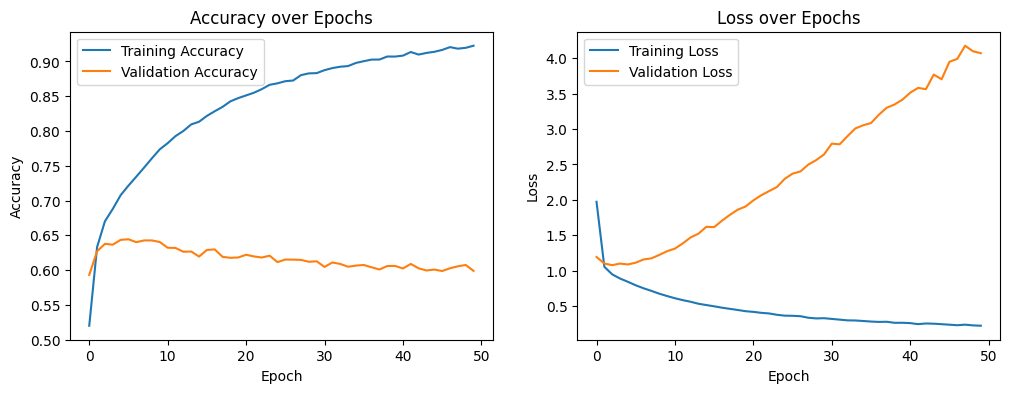

Accuracy: 60.0%
Loss: 4.12


In [106]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

print(
    f'Accuracy: {round(test_accuracy, 2) * 100}%\n'
    f'Loss: {round(test_loss, 2)}'    
)

# Tasks
- Experiement with different setups of fully connected layers

# Finetune VGG16

In [107]:
def create_vgg_finetuning_model():
    # Load pre-trained VGG16 model without the top layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    # Fine-tune from this layer onwards
    fine_tune_at = 4

    # Freeze all the layers before the `fine_tune_at` layer
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False
    
    # Create a new model on top
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = base_model(inputs)
    x = Flatten()(x)
    x = Dense(100, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)

    # It's important to recompile the model after making any changes
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [108]:
model = create_vgg_finetuning_model()

In [109]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               51300     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 14,766,998
Trainable params: 14,728,278
Non-trainable params: 38,720
_________________________________________________________________


In [110]:
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
1250/1250 [==============================] - 3695s 3s/step - loss: 1.3201 - accuracy: 0.5852 - val_loss: 0.8070 - val_accuracy: 0.7239
Epoch 2/50
1250/1250 [==============================] - 3682s 3s/step - loss: 0.6784 - accuracy: 0.7679 - val_loss: 0.6741 - val_accuracy: 0.7712
Epoch 3/50
1250/1250 [==============================] - 3682s 3s/step - loss: 0.5302 - accuracy: 0.8170 - val_loss: 0.6055 - val_accuracy: 0.7918
Epoch 4/50
1250/1250 [==============================] - 3698s 3s/step - loss: 0.4231 - accuracy: 0.8543 - val_loss: 0.5428 - val_accuracy: 0.8147
Epoch 5/50
1250/1250 [==============================] - 3684s 3s/step - loss: 0.3290 - accuracy: 0.8862 - val_loss: 0.5730 - val_accuracy: 0.8166
Epoch 6/50
1250/1250 [==============================] - 3686s 3s/step - loss: 0.2519 - accuracy: 0.9134 - val_loss: 0.5675 - val_accuracy: 0.8265
Epoch 7/50
1250/1250 [==============================] - 3690s 3s/step - loss: 0.1830 - accuracy: 0.9373 - val_loss: 0.5775 -

KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

print(
    f'Accuracy: {round(test_accuracy, 2) * 100}%\n'
    f'Loss: {round(test_loss, 2)}'    
)

# Task
- Experiment with different amount of layers to finetune
  - Does it effect the training time?
- Experiment with different fully connected layers